In [97]:
import pandas as pd

df = pd.read_csv(r"Final Dataset.csv")
df

,game_id,is_white,avg_pr,sesh_cnt,elo_diff,streak,result
0,ID0001,0,589.8000,1,0,0,1.0
1,ID0002,1,511.3333,2,8,1,1.0
2,ID0003,0,169.5000,3,16,2,1.0
3,ID0004,0,446.3333,1,-8,0,0.0
4,ID0005,1,641.0000,2,-17,-1,0.0
...,...,...,...,...,...,...,...
8537,ID8996,0,177.0000,9,8,0,1.0
8538,ID8997,1,397.1667,1,-1,1,1.0
8539,ID8998,1,331.0000,2,-9,0,0.0
8540,ID8999,0,128.6667,3,-1,0,1.0


In [98]:
df = df.drop('game_id', axis=1) 
df

,is_white,avg_pr,sesh_cnt,elo_diff,streak,result
0,0,589.8000,1,0,0,1.0
1,1,511.3333,2,8,1,1.0
2,0,169.5000,3,16,2,1.0
3,0,446.3333,1,-8,0,0.0
4,1,641.0000,2,-17,-1,0.0
...,...,...,...,...,...,...
8537,0,177.0000,9,8,0,1.0
8538,1,397.1667,1,-1,1,1.0
8539,1,331.0000,2,-9,0,0.0
8540,0,128.6667,3,-1,0,1.0


In [103]:
df['result'] = df['result'].apply(lambda x: 'Lose' if x == 0.0
                                  else 'Win' if x == 1.0 else 'Draw' if x == 0.5 else x)
df

,is_white,avg_pr,sesh_cnt,elo_diff,streak,result
0,0,589.8000,1,0,0,Win
1,1,511.3333,2,8,1,Win
2,0,169.5000,3,16,2,Win
3,0,446.3333,1,-8,0,Lose
4,1,641.0000,2,-17,-1,Lose
...,...,...,...,...,...,...
8537,0,177.0000,9,8,0,Win
8538,1,397.1667,1,-1,1,Win
8539,1,331.0000,2,-9,0,Lose
8540,0,128.6667,3,-1,0,Win


In [104]:
df.result.value_counts()

result
Win     4189
Lose    4074
Draw     279
Name: count, dtype: int64

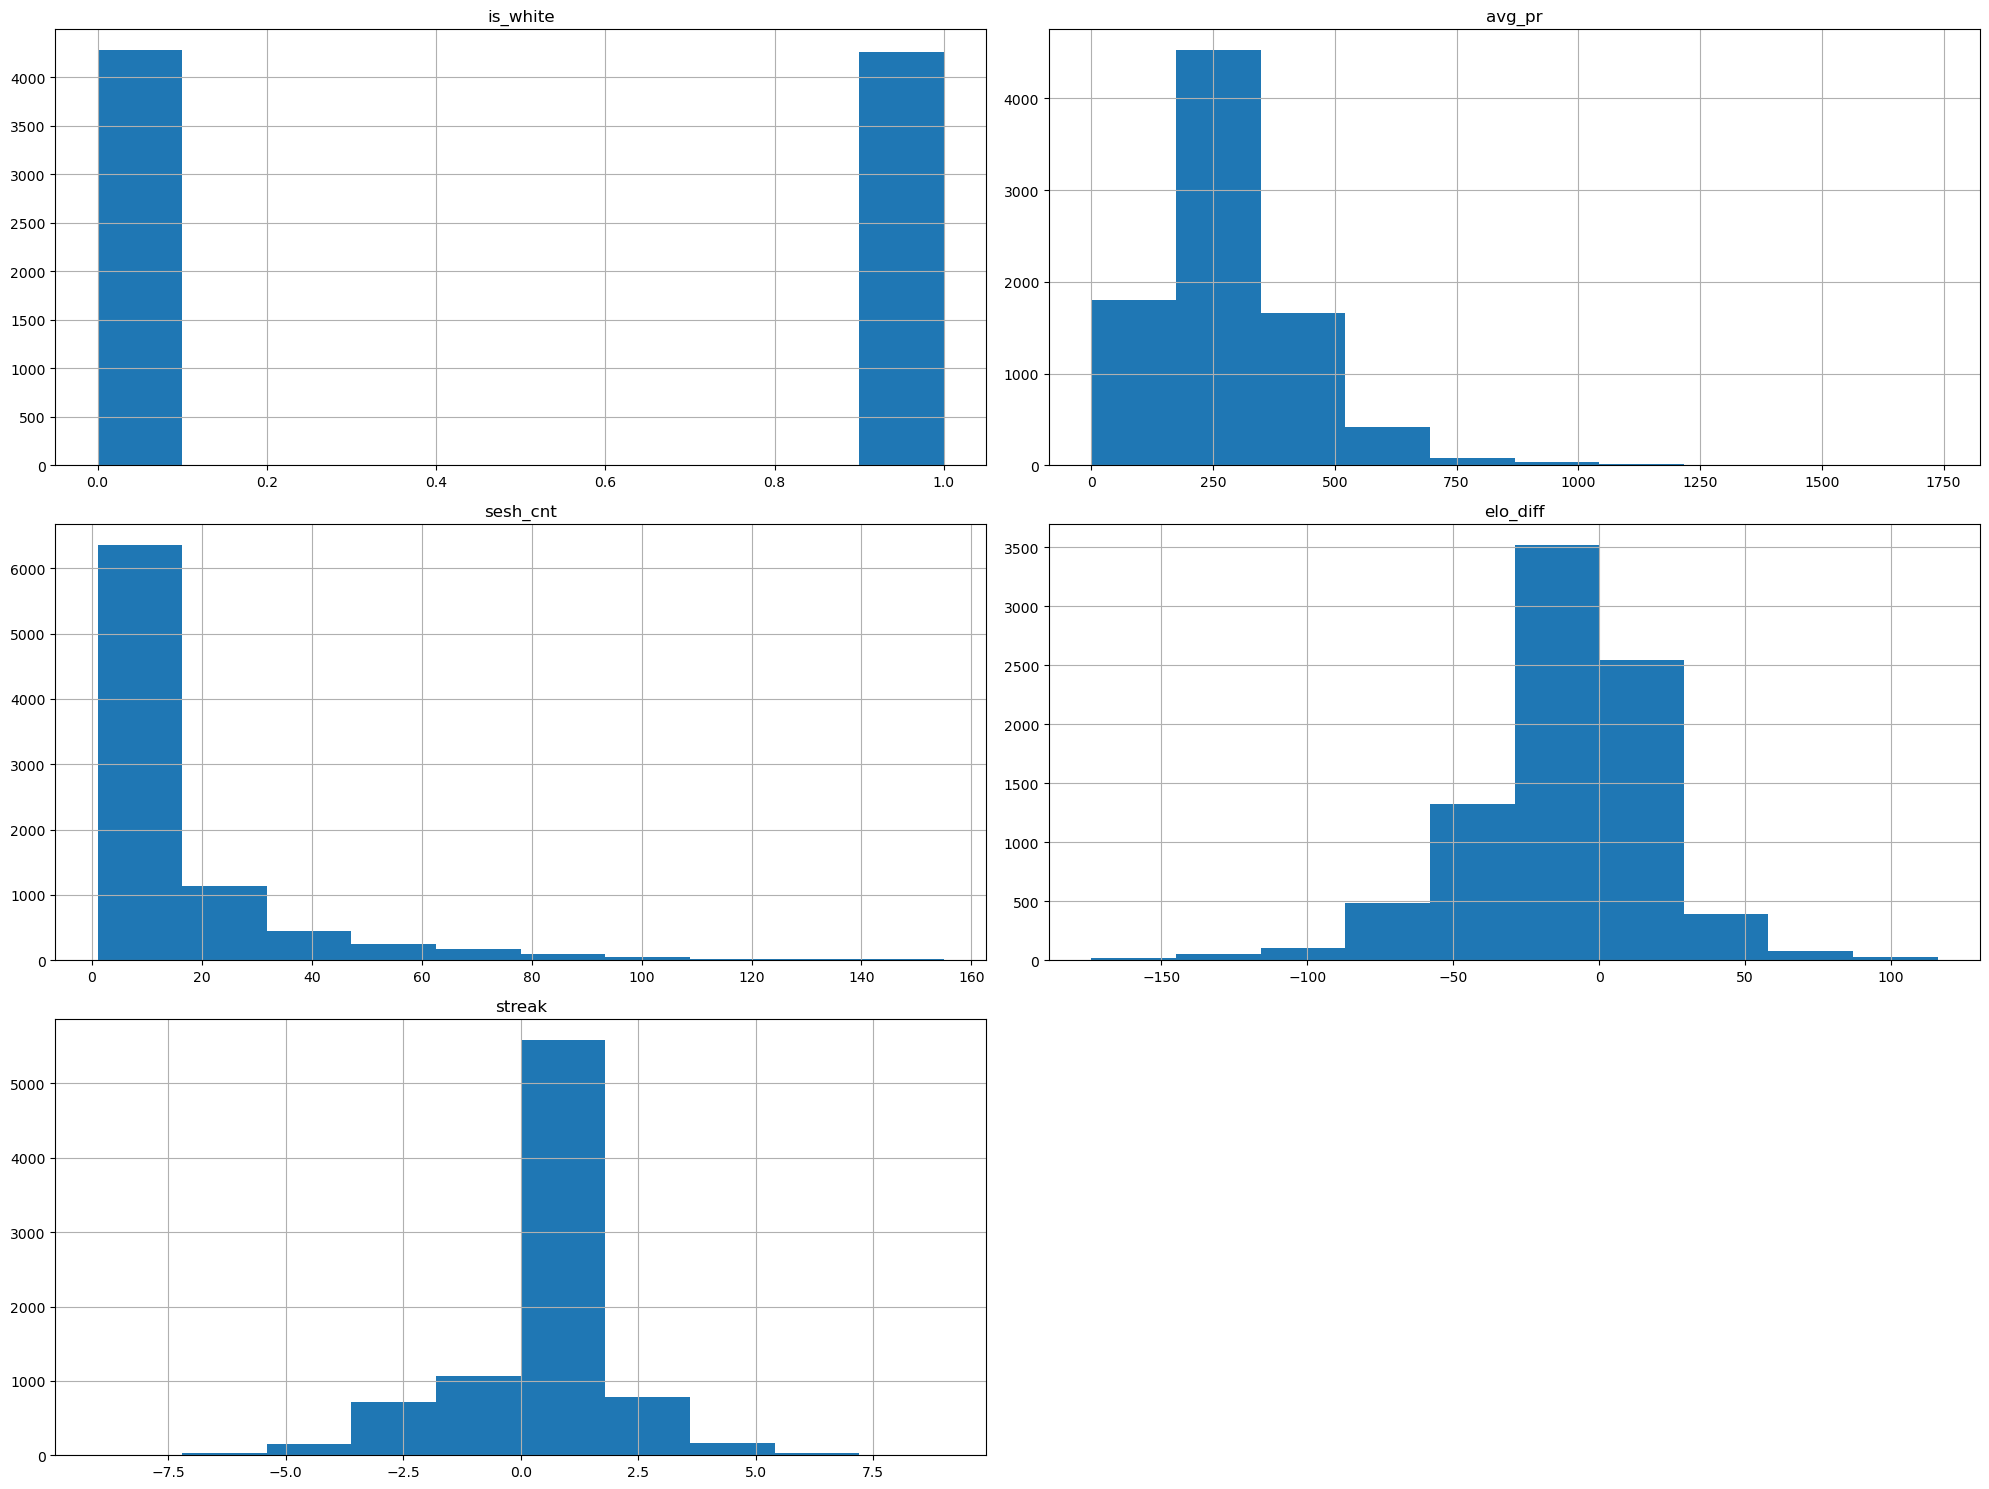

In [106]:
import matplotlib.pyplot as plt

df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y = df.drop('result', axis=1), df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier(n_jobs = -1)

model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [165]:
model.score(X_test, y_test)

0.7677004095962551

In [120]:
import joblib

joblib.dump(value=model, filename='Chessica.pkl')

['Chessica.pkl']

In [121]:
sorted_importances = dict(sorted(zip(model.feature_names_in_, model.feature_importances_),
                                 key=lambda x: x[1], reverse=True))
sorted_importances

{'streak': np.float64(0.38201602693619924),
 'avg_pr': np.float64(0.23095213754515995),
 'elo_diff': np.float64(0.2187520006578191),
 'sesh_cnt': np.float64(0.1544631093370886),
 'is_white': np.float64(0.013816725523733128)}

<BarContainer object of 5 artists>

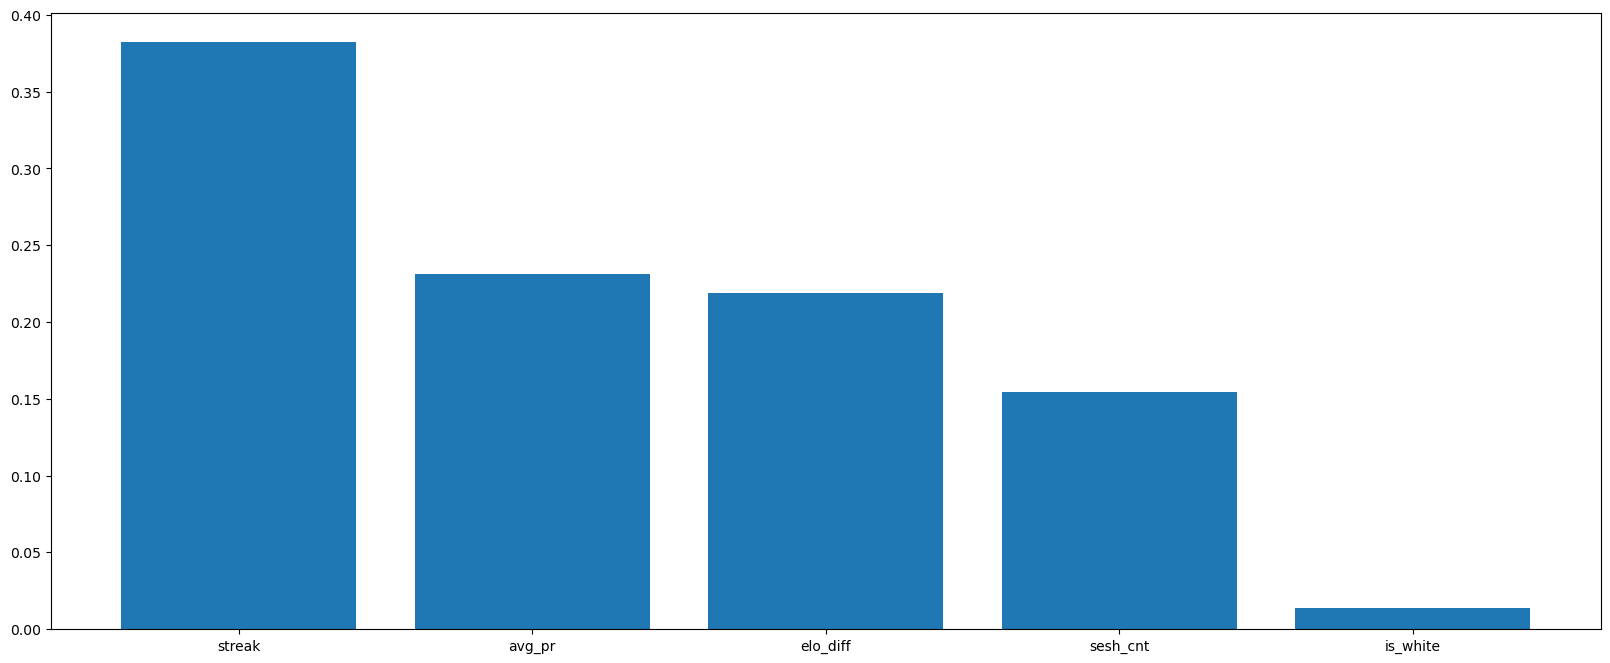

In [122]:
plt.figure(figsize=(20,8))
plt.bar(sorted_importances.keys(), sorted_importances.values())

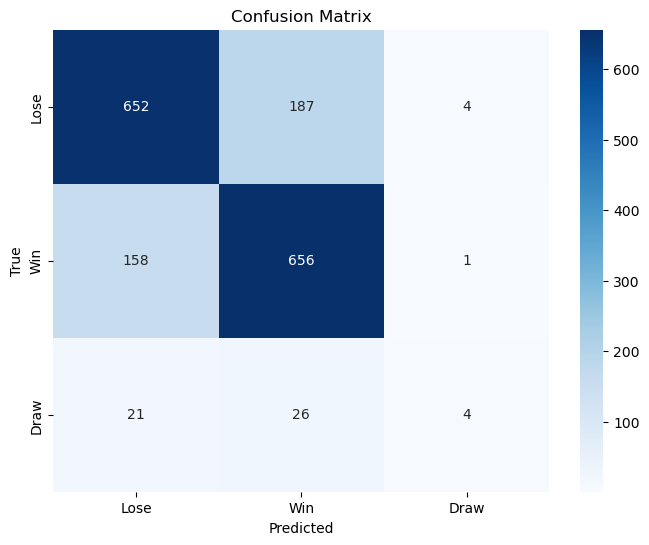

In [174]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["Lose", "Win", "Draw"])

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Lose", "Win", "Draw"],
            yticklabels=["Lose", "Win", "Draw"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
